In [585]:
from bs4 import BeautifulSoup  # Правильное написание с заглавной 'B' и 'S'

import requests
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymorphy2
import dask.bag as db

In [587]:
url = "https://www.lib.ru/INPROZ/BARBUS/lefeu.txt"
response = requests.get(url)
soup = bs4.BeautifulSoup(response.text, 'html')
text = soup.body.get_text(' ', strip = True)

### Создание морфологического анализатора

In [590]:
def pymorphy2_311_hotfix():
    from inspect import getfullargspec
    from pymorphy2.units.base import BaseAnalyzerUnit

    def _get_param_names_311(klass):
        if klass.__init__ is object.__init__:
            return []
        args = getfullargspec(klass.__init__).args
        return sorted(args[1:])

    setattr(BaseAnalyzerUnit, '_get_param_names', _get_param_names_311)

### Частота встречаемых слов

##### Записываем в "input.txt" считанные данные с сайта

In [594]:
with open("input.txt", "w") as file:
    file.write(text)

##### Так как у нас кодировка cp1251 присваеваем data текст в данной кодировке

In [597]:
data = db.read_text('input.txt', encoding='cp1251', errors='ignore')

In [599]:
data.compute()

['Fb2.zip Epub Содержание Fine HTML Printed version txt(Word,КПК) Lib.ru html Анри Барбюс. Огонь Дневник взвода\n',
 '\n',
 '\n',
 '     -----------------------------------------------------------------------\n',
 '     "Le feu". Перевод с французского В.Парнаха\n',
 '     Барбюс А. Огонь; Ясность: Романы. / Предисл. С.Емельяникова.\n',
 '     М.: Худож. лит., 1980. - 540 с.\n',
 '     OCR & SpellCheck: Zmiy (zmiy@inbox.ru), 11 декабря 2003 года\n',
 '     -----------------------------------------------------------------------\n',
 '\n',
 '     Анри  Барбюc  (1873-1935)  -  французский   писатель   и   общественный\n',
 'деятель  -  коммунист.  Всемирную  известность  принес  ему  роман   "Огонь"\n',
 '(1916) - первое подлинно революционное произведение  французской  литературы\n',
 'XX века. Об империалистической войне 1914 - 1918 гг., о том,  что  произошло\n',
 'со многими участниками войны, ставшими революционерами, Барбюс  рассказывает\n',
 'в романе "Ясность" (1919). СОДЕРЖАНИЕ М

##### Разделяем строки

In [602]:
data.str.split().compute()

[['Fb2.zip',
  'Epub',
  'Содержание',
  'Fine',
  'HTML',
  'Printed',
  'version',
  'txt(Word,КПК)',
  'Lib.ru',
  'html',
  'Анри',
  'Барбюс.',
  'Огонь',
  'Дневник',
  'взвода'],
 [],
 [],
 ['-----------------------------------------------------------------------'],
 ['"Le', 'feu".', 'Перевод', 'с', 'французского', 'В.Парнаха'],
 ['Барбюс',
  'А.',
  'Огонь;',
  'Ясность:',
  'Романы.',
  '/',
  'Предисл.',
  'С.Емельяникова.'],
 ['М.:', 'Худож.', 'лит.,', '1980.', '-', '540', 'с.'],
 ['OCR',
  '&',
  'SpellCheck:',
  'Zmiy',
  '(zmiy@inbox.ru),',
  '11',
  'декабря',
  '2003',
  'года'],
 ['-----------------------------------------------------------------------'],
 [],
 ['Анри',
  'Барбюc',
  '(1873-1935)',
  '-',
  'французский',
  'писатель',
  'и',
  'общественный'],
 ['деятель',
  '-',
  'коммунист.',
  'Всемирную',
  'известность',
  'принес',
  'ему',
  'роман',
  '"Огонь"'],
 ['(1916)',
  '-',
  'первое',
  'подлинно',
  'революционное',
  'произведение',
  'французской'

##### Преобразовываем в один общий список слов (плоский список)

In [605]:
words = data.str.split().flatten()
type(words)

dask.bag.core.Bag

##### Убираем слова меньше 4-х символов

In [608]:
words = [word for word in words if len(word) >= 4]
type(words)

list

##### Преобразовываем опять в Bag

In [611]:
words = db.from_sequence(words)
type(words)

dask.bag.core.Bag

In [613]:
words.compute()

['Fb2.zip',
 'Epub',
 'Содержание',
 'Fine',
 'HTML',
 'Printed',
 'version',
 'txt(Word,КПК)',
 'Lib.ru',
 'html',
 'Анри',
 'Барбюс.',
 'Огонь',
 'Дневник',
 'взвода',
 '-----------------------------------------------------------------------',
 'feu".',
 'Перевод',
 'французского',
 'В.Парнаха',
 'Барбюс',
 'Огонь;',
 'Ясность:',
 'Романы.',
 'Предисл.',
 'С.Емельяникова.',
 'Худож.',
 'лит.,',
 '1980.',
 'SpellCheck:',
 'Zmiy',
 '(zmiy@inbox.ru),',
 'декабря',
 '2003',
 'года',
 '-----------------------------------------------------------------------',
 'Анри',
 'Барбюc',
 '(1873-1935)',
 'французский',
 'писатель',
 'общественный',
 'деятель',
 'коммунист.',
 'Всемирную',
 'известность',
 'принес',
 'роман',
 '"Огонь"',
 '(1916)',
 'первое',
 'подлинно',
 'революционное',
 'произведение',
 'французской',
 'литературы',
 'века.',
 'империалистической',
 'войне',
 '1914',
 '1918',
 'гг.,',
 'том,',
 'произошло',
 'многими',
 'участниками',
 'войны,',
 'ставшими',
 'революционерами,',

##### Считаем количество каждых слов

In [616]:
word_count = words.frequencies()

In [618]:
word_count.compute()

[('Fb2.zip', 1),
 ('Epub', 1),
 ('Содержание', 1),
 ('Fine', 1),
 ('HTML', 1),
 ('Printed', 1),
 ('version', 1),
 ('txt(Word,КПК)', 1),
 ('Lib.ru', 1),
 ('html', 1),
 ('Анри', 3),
 ('Барбюс.', 1),
 ('Огонь', 3),
 ('Дневник', 1),
 ('взвода', 6),
 ('-----------------------------------------------------------------------',
  2),
 ('feu".', 1),
 ('Перевод', 1),
 ('французского', 2),
 ('В.Парнаха', 1),
 ('Барбюс', 4),
 ('Огонь;', 1),
 ('Ясность:', 1),
 ('Романы.', 1),
 ('Предисл.', 1),
 ('С.Емельяникова.', 1),
 ('Худож.', 1),
 ('лит.,', 1),
 ('1980.', 1),
 ('SpellCheck:', 1),
 ('Zmiy', 1),
 ('(zmiy@inbox.ru),', 1),
 ('декабря', 1),
 ('2003', 2),
 ('года', 13),
 ('Барбюc', 1),
 ('(1873-1935)', 1),
 ('французский', 2),
 ('писатель', 1),
 ('общественный', 1),
 ('деятель', 1),
 ('коммунист.', 1),
 ('Всемирную', 1),
 ('известность', 1),
 ('принес', 2),
 ('роман', 1),
 ('"Огонь"', 1),
 ('(1916)', 1),
 ('первое', 5),
 ('подлинно', 1),
 ('революционное', 1),
 ('произведение', 1),
 ('французской', 4

In [620]:
word_counts = pd.DataFrame(word_count, columns=['Word', 'Frequency']).sort_values(by="Frequency", ascending = False)

In [622]:
word_counts2 = word_counts.head(10)

In [624]:
word_counts2

,Word,Frequency
456,только,249
317,говорит,245
956,меня,165
437,когда,148
315,больше,146
345,даже,140
1120,словно,140
624,него,128
150,этой,118
469,чтобы,110


### Строим гистограмму

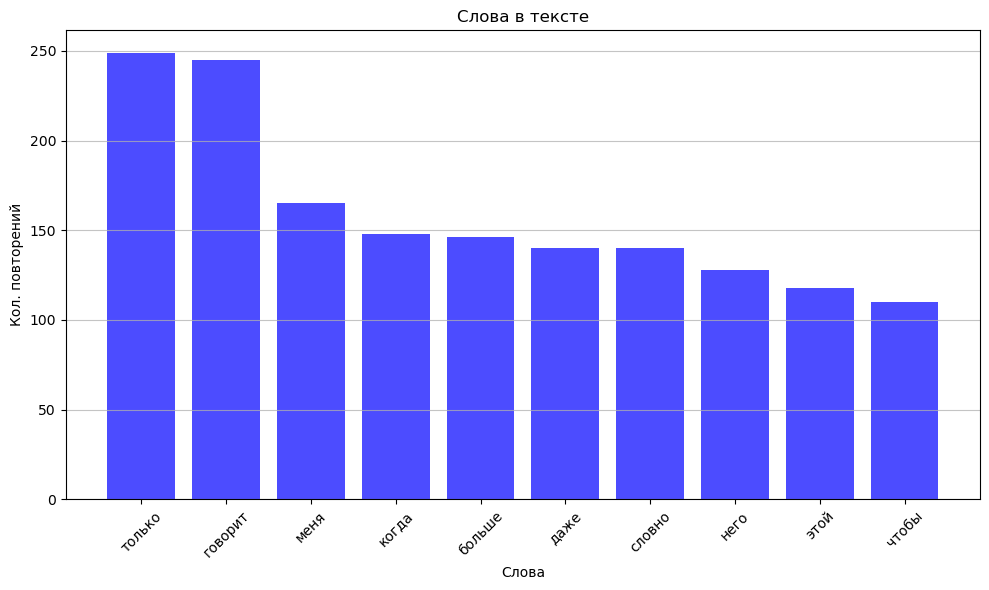

In [627]:
plt.figure(figsize=(10, 6)) 
plt.bar(word_counts2['Word'], word_counts2['Frequency'], color='blue', alpha=0.7) 
plt.title('Слова в тексте') 
plt.xlabel('Слова') 
plt.ylabel('Кол. повторений')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout() 
plt.show() 